# Analysis Histalp
## Example: ZAMG Hohe Warte

First we load in the dataset with pandas, specify the date columns and skip the first few rows because they contain data that pandas doesn't recognise.

API CALLS:
https://dataset.api.hub.geosphere.at/v1/station/current/tawes-v1-10min?parameters=TL,TP,TLMAX,11035

https://dataset.api.hub.geosphere.at/v1/grid/historical/snowgrid_cl-v2-1d-1km?parameters=swe_tot&start=2024-08-12&end=2024-08-13&bbox=46.16132856869247,9.393909734939893,49.177527691779716,17.382180045432914

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plots inlibe
%matplotlib inline
# Turn off some warning
pd.options.mode.chained_assignment = None

###############################################
plt.rcParams['figure.figsize'] = (15, 7)
df = pd.read_csv('HOMSTART_1948-01-01_2009-12-31.csv',skiprows=15,delimiter=';', parse_dates=['datum'], index_col='datum')
# Get all the monthly means
df_monthly = df.resample('1MS').mean()
# All the annual means
df_annual_mean = df.resample('1AS').mean()
# For earch day of the year get the maximum values
df_daily_max = df.groupby([df.index.dayofyear]).max()
# For each day of the year get the minimum values
df_daily_min = df.groupby([df.index.dayofyear]).min()
# Also get the daily means of tmax, tmin, rr
df_daily_mean = df.groupby([df.index.dayofyear]).mean()

These few lines of code put us in a really great position to already do some interesting analysis with the provided data. If we would like to find out the record maximum and minimum temperatures recorded for specific days of the year we can do that easily. We then go on to visualise what we found out

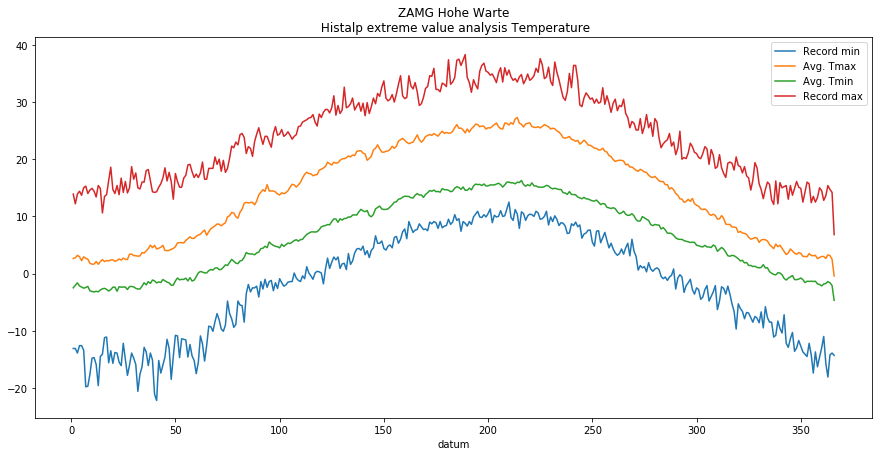

In [8]:
df_daily_min['tmin'].plot(label='Record min')
df_daily_mean['tmax'].plot(label='Avg. Tmax')
df_daily_mean['tmin'].plot(label='Avg. Tmin')
df_daily_max['tmax'].plot(label='Record max')

plt.title('ZAMG Hohe Warte\n Histalp extreme value analysis Temperature')
plt.legend()



We can also visualise the maximum 24hr precipitation for every specific day of the year, same as above. We'll also plot the average precipitation for every specific day. We can also output the 10 largest 24hr maxima of precipitation in a table, which also includes the date

# Record precipitation events

,tmin,tmax,rr
datum,,,
1951-05-10,9.9,16.8,92.8
1991-05-17,5.0,10.0,84.9
1979-06-25,15.0,26.9,78.1
2003-05-13,13.0,24.5,77.1
1959-08-12,16.0,22.8,75.7
1965-06-05,12.7,15.3,70.6
1975-06-30,11.9,19.0,68.0
2009-06-22,12.5,17.5,67.5
1997-07-06,13.9,18.6,64.6


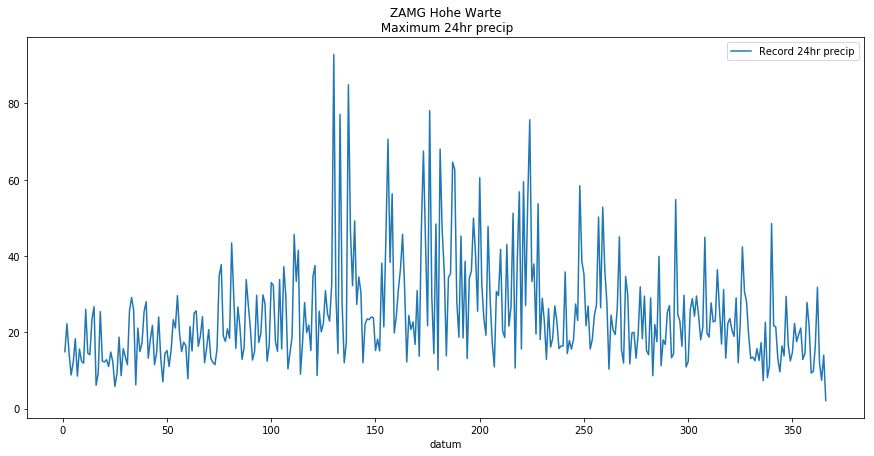

In [9]:
df_daily_max['rr'].plot(label='Record 24hr precip')
plt.legend()
plt.title('ZAMG Hohe Warte\n Maximum 24hr precip')
df.nlargest(10,'rr')

# Analysis of potential record snowfall events
Limited to days where the maximum temperature is below 1C (which might not capture all events), it is possible to extract the days with maximum 24hr snowfall events (mm water equivalent). This doesn't necessarily reflect the days with the maximum snow height, as this is a function of the snow density as well.

In [10]:
df_snow_precip = df[df['tmax'] <= 1]
df_snow_precip.nlargest(15, 'rr')

,tmin,tmax,rr
datum,,,
1993-02-24,-4.9,-3.4,29.6
1974-01-15,-2.1,-0.1,26.7
1968-01-14,-14.1,-8.3,23.4
1958-03-02,-2.5,0.2,21.5
1984-02-23,-0.8,0.5,21.1
1980-11-04,-2.1,-0.4,19.8
1971-11-23,-3.4,0.8,18.2
1983-02-11,-1.9,-0.1,18.1
1986-02-09,-10.6,-8.5,16.8


There are some quite **extreme** events in this data record. On the **1993-02-24** there was a day with **29.6 mm** snow, falling at a maximum temperature of **-3.4C**. 
Another outstanding event happened on **1968-01-14**, with temperatures staying below **-8.3C** all day, the station at Hohe Warte in Vienna recorded **23.4 mm** in 24hr alone.

# Last day in each year with temperatures below 0C or ice day

Text(0,0.5,'Day of year')

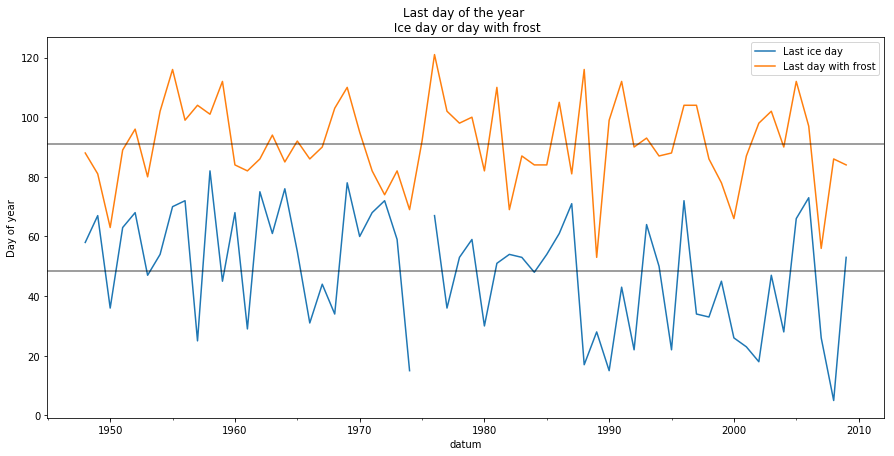

In [11]:
# Find last frost day in each year
df_tmin_test = df[(df['tmin'] <= 0) & (df.index.dayofyear <180)]
df_tmin_test['dayofyear'] = df_tmin_test.index.dayofyear
last_day_night_freeze = df_tmin_test.resample('1AS').max()['dayofyear']

# Find last ice day of each year
df_iceday = df[(df['tmax'] <= 0) & (df.index.dayofyear <180)]
df_iceday['dayofyear'] = df_iceday.index.dayofyear
last_ice_day = df_iceday.resample('1AS').max()['dayofyear']


# Plotting
last_ice_day.plot(label='Last ice day')
last_day_night_freeze.plot(label='Last day with frost')
plt.title('Last day of the year \n Ice day or day with frost')

# Plot averages as horizontal lines
plt.axhline(last_ice_day.mean(),c='black', alpha=0.5)
plt.axhline(last_day_night_freeze.mean(),c='black', alpha=0.5)
plt.legend()

plt.ylabel('Day of year')



# Record minimum temperature
We can the do a extreme value analysis for example, to find the 10 days with lowest **Tmin**, highest **Tmax** and highest **24hr precipitation** for example.

The following list are the 10 days with the lowest Tmin between 1948 and 2009 at Hohe Warte.

In [12]:
df.nsmallest(10,'tmin')[['tmin','tmax','rr']]


,tmin,tmax,rr
datum,,,
1956-02-10,-22.2,-14.0,1.6
1956-02-09,-21.1,-5.3,0.0
1956-02-01,-20.6,-15.0,0.1
1985-01-07,-19.8,-12.0,-0.1
1985-01-08,-19.7,-15.1,-0.1
1987-01-13,-19.6,-13.4,0.0
1956-02-17,-18.5,-9.3,-0.1
1996-12-28,-18.1,-10.5,-0.1
1954-01-27,-17.8,-11.6,-0.1


# Record maximum temperature
The following list contains the 10 days with the highest Tmax between 1948 and 2009 at ZAMG Hohe Warte.

In [13]:
df.nlargest(10,'tmax')[['tmin','tmax','rr']]


,tmin,tmax,rr
datum,,,
1957-07-08,22.0,38.3,0.0
2003-08-13,18.6,37.6,7.3
1957-07-05,19.2,37.5,-0.1
1950-06-30,18.8,37.4,-0.1
1950-07-04,21.0,37.3,-0.1
1957-07-07,22.5,37.3,-0.1
2000-08-19,19.3,37.0,-0.1
2007-07-17,19.2,36.8,-0.1
2003-08-14,21.4,36.5,0.0


# What tmin and tmax to expect in March

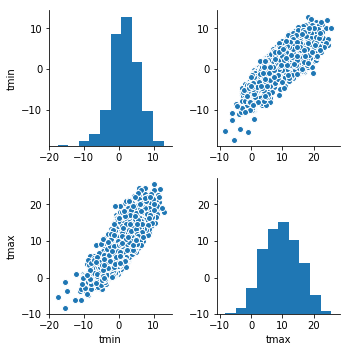

In [30]:
sns.pairplot(data=df[df.index.month==3][['tmin','tmax']],dropna=True)

# Average Minimum March
avg_min_march = df[df.index.month==3]['tmin'].mean()

#Average maximum March
avg_max_march = df[df.index.month==3]['tmax'].mean()

In [31]:
print('The average Tmin in March is: {} '.format(round(avg_min_march,2)))
print('The average Tmax in March is: {} '.format(round(avg_max_march,2)))

The average Tmin in March is: 1.71 
The average Tmax in March is: 9.74 


### The 5 lowest tmin and 5 highest tmax in March in Vienna are:

In [32]:
df[df.index.month==3]['tmin'].nsmallest(5)

datum
1963-03-01   -17.5
1963-03-02   -15.5
1971-03-05   -15.3
1987-03-05   -14.7
1971-03-06   -12.6
Name: tmin, dtype: float64

In [33]:
df[df.index.month==3]['tmax'].nlargest(5)

datum
1989-03-31    25.5
1977-03-23    24.5
1953-03-30    24.4
1990-03-22    24.3
1968-03-30    23.9
Name: tmax, dtype: float64